In [1]:
# Basic libraries
import os
import pandas as pd
import numpy as np
import openai

# GenAI
from langchain.document_loaders import PyPDFLoader 
# from langchain_experimental.text_splitter import SemanticChunker
from langchain_text_splitters import RecursiveCharacterTextSplitter
from dotenv import load_dotenv

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="color: #5dade2;">Loading the Documents</h2>

In [2]:
# Load document
DATA_PATH = "../data/Student-Cookbook.pdf"
loader = PyPDFLoader(DATA_PATH)
documents= loader.load()

Ignoring wrong pointing object 19 0 (offset 0)
Ignoring wrong pointing object 28 0 (offset 0)
Ignoring wrong pointing object 46 0 (offset 0)
Ignoring wrong pointing object 53 0 (offset 0)
Ignoring wrong pointing object 91 0 (offset 0)
Ignoring wrong pointing object 169 0 (offset 0)


<h2 style="color: #5dade2;"> Documents into chunks</h2>

In [3]:
text_splitter = RecursiveCharacterTextSplitter(
        chunk_size = 1000,
        chunk_overlap = 200,
        length_function =len,
        is_separator_regex=False,
    )

chunks = text_splitter.split_documents(documents)

In [4]:
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY") 
openai.api_key = api_key

In [5]:
# Extract the content (text) from the documents
document_texts = [doc.page_content for doc in documents]

In [6]:
# text_splitter = SemanticChunker(
#     OpenAIEmbeddings(), 
#     breakpoint_threshold_type="percentile"
# )
# chunks = text_splitter.create_documents(document_texts)

<h2 style="color: #5dade2;"> EDA for chunks</h2>

In [7]:
# Check how many chunks do we have
len(chunks)

184

### Frequency count

In [8]:
# Measure the length of each chunk
chunk_lengths = [len(chunk.page_content) for chunk in chunks]  

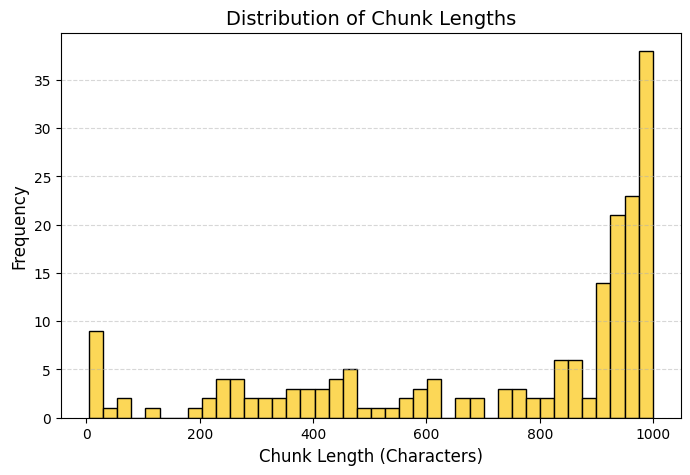

In [ ]:
# Plot the histogram
plt.figure(figsize=(8, 5))  
plt.hist(chunk_lengths, bins=40, color='#FCD757', edgecolor='black') 

# Adding labels and title to the plot
plt.xlabel('Chunk Length (Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Chunk Lengths', fontsize=14)

# Show Grid for Better Readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

#plt.savefig('chunk_lengths.png', transparent=True)

# Show the plot
plt.show()

In [10]:
# Calculate min, max and average length of the chunks
min_length = min(chunk_lengths)
max_length = max(chunk_lengths)
avg_length = np.mean(chunk_lengths)

# Print summary statistics
print(f"Min Length: {min_length}")
print(f"Max Length: {max_length}")
print(f"Avg Length: {avg_length:.2f}")

Min Length: 5
Max Length: 999
Avg Length: 728.59


In [16]:
# Create a bar chart for Min, Max, and Avg Lengths
labels = ['Min Length', 'Max Length', 'Avg Length']
values = [min_length, max_length, avg_length]

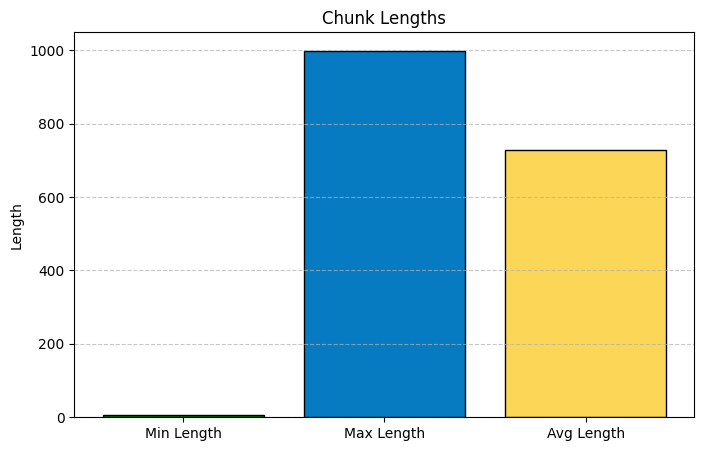

In [37]:
# Plotting the bar chart
plt.figure(figsize=(8, 5))  
plt.bar(labels, values,  color=['green', '#067BC2', '#FCD757'], edgecolor='black')
plt.title('Chunk Lengths')
plt.ylabel('Length')

plt.grid(axis='y', linestyle='--', alpha=0.7)

#plt.savefig('chunk_lengths.png', transparent=True)

plt.show()

### Empty or corrupted chunks

In [11]:
# Looking for empty or corrupted chunks
# Check for empty or corrupted chunks
empty_chunks = [chunk for chunk in chunks if len(chunk.page_content.strip()) == 0]
corrupted_chunks = [chunk for chunk in chunks if not chunk.page_content.isprintable()]

# Print the number of empty and corrupted chunks
print(f"Number of Empty Chunks: {len(empty_chunks)}")
print(f"Number of Corrupted Chunks: {len(corrupted_chunks)}")

# You can print some example corrupted chunks to inspect
if corrupted_chunks:
    print("Example of Corrupted Chunks:")
    for x in range(30,35):
        print()
        print(corrupted_chunks[x])

Number of Empty Chunks: 0
Number of Corrupted Chunks: 179
Example of Corrupted Chunks:

page_content='19 
 
 
 
 
1. Preheat oven to 400 °F.  
2. Mix dry ingredients together well.  
3. In a separate bowl, mix milk, oil, and egg. Make a well in the center of the dry ingredients. 
Pour in the wet ingredients and stir until moistened, leaving the mixture slightly lumpy.  
4. Fill sprayed muffin pans about 2/3 full. Bake 20-25 minutes. Makes 10-12. 
 
Blueberry Muffins: Add ¾ cup fresh or frozen (thawed) blueberries. Add 1 tsp. zested lemon 
peel if desired. 
Cranberry orange muffins: Add 1 cup fresh, frozen (thawed), or dried cranberries and combine 
with ¼ c more sugar and orange zest to taste. Fold into batter. 
Pumpkin: Increase sugar to 1/3 c and add ½ c canned pumpkin to egg mixture. Stir ½ tsp ground 
cinnamon and ½ tsp. ground nutmeg into flour mixture.  
 
 
 
Waffles 
Waffles take a bit of time to make so this is another great weekend breakfast option! 
 
1 ¾ cup flour (white, w